In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve

# Решить численно в диапазоне x [0,2] с шагом h=0.5, задачу Коши.
---
## 1
### Вариант 3
## yʹ=0.5y+2.4x2+3.7
## y(0)=1

#### Построить графики решения, результата расчетов свести в таблицу, сравнить точность. Сделать общие выводы, проанализировав полученные результаты.

Результаты:
     x  Численное решение (метод Эйлера)    Точное решение  \
0  0.0                          1.000000  1.00000000000000   
1  0.5                          3.100000  3.49238950098630   
2  1.0                          6.025000  7.36015546876600   
3  1.5                         10.581250  13.6756007774732   
4  2.0                         17.776563  23.8155895718833   

  Абсолютная погрешность  
0                      0  
1      0.392389500986301  
2       1.33515546876600  
3       3.09435077747317  
4       6.03902707188331  


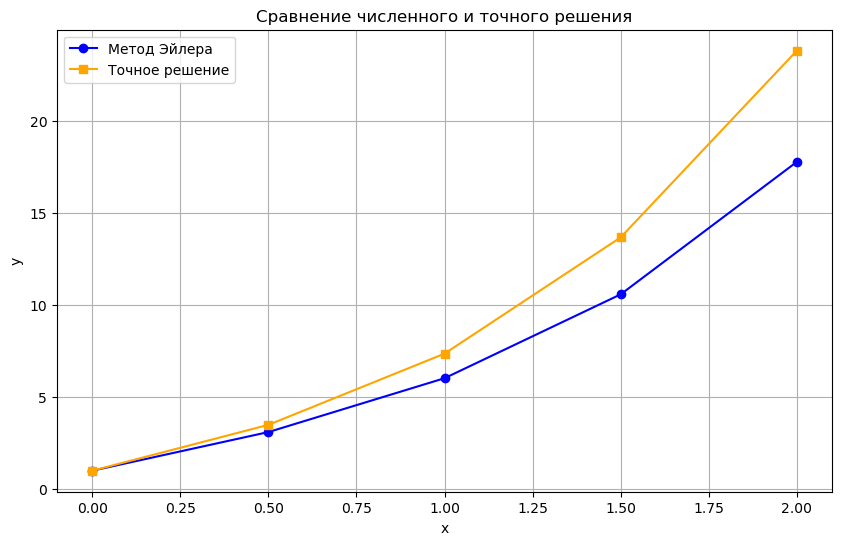

Средняя абсолютная погрешность: 2.172185


In [2]:
# Параметры задачи
h = 0.5  # Шаг
x_start, x_end = 0, 2  # Диапазон
y0 = 1  # Начальное условие y(0) = 1

# Дифференциальное уравнение: y' = f(x, y)
def f(x, y):
    return 0.5 * y + 2.4 * x**2 + 3.7

# Метод Эйлера
def euler_method(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0
    while x < x_end:
        y = y + h * f(x, y)  # Формула метода Эйлера
        x = round(x + h, 10)  # Избегаем ошибок округления
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Вычисление методом Эйлера
x_vals, y_vals = euler_method(f, x_start, y0, h, x_end)

# Точное решение с использованием SymPy
x = symbols('x')
y = Function('y')
exact_solution = dsolve(Eq(y(x).diff(x), 0.5 * y(x) + 2.4 * x**2 + 3.7), y(x), ics={y(0): y0})
exact_func = exact_solution.rhs

# Вычисление точного решения в тех же точках
exact_vals = [exact_func.evalf(subs={x: xi}) for xi in x_vals]

# Создание таблицы результатов
data = {
    "x": x_vals,
    "Численное решение (метод Эйлера)": y_vals,
    "Точное решение": exact_vals,
    "Абсолютная погрешность": [abs(yv - ev) for yv, ev in zip(y_vals, exact_vals)]
}
df = pd.DataFrame(data)
print("Результаты:")
print(df)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker="o", label="Метод Эйлера", color="blue")
plt.plot(x_vals, exact_vals, marker="s", label="Точное решение", color="orange")
plt.title("Сравнение численного и точного решения")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Анализ точности
mean_error = np.mean(data["Абсолютная погрешность"])
print(f"Средняя абсолютная погрешность: {mean_error:.6f}")


## 2. модифицированным методом Эйлера.

Результаты:
     x  Численное решение (модиф. Эйлер)    Точное решение  \
0  0.0                          1.000000  1.00000000000000   
1  0.5                          3.512500  3.49238950098630   
2  1.0                          7.369141  7.36015546876600   
3  1.5                         13.622961  13.6756007774732   
4  2.0                         23.623169  23.8155895718833   

  Абсолютная погрешность  
0                      0  
1     0.0201104990136991  
2    0.00898515623400353  
3     0.0526393516919228  
4      0.192420245101090  


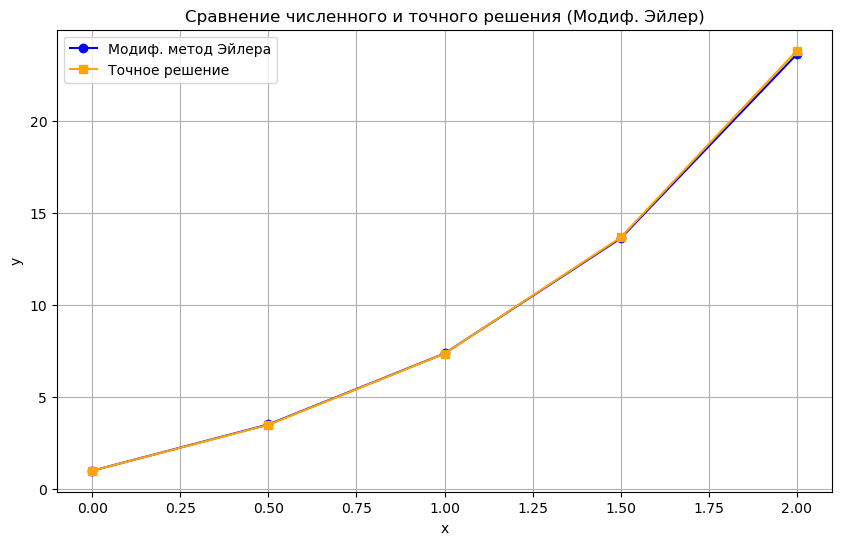

Средняя абсолютная погрешность: 0.054831


In [3]:
# Исходные параметры
h = 0.5  # Шаг
x_start, x_end = 0, 2  # Диапазон
y0 = 1  # Начальное условие

# Дифференциальное уравнение: y' = f(x, y)
def f(x, y):
    return 0.5 * y + 2.4 * x**2 + 3.7

# Модифицированный метод Эйлера
def modified_euler_method(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0
    while x < x_end:
        # Прогнозирование y*
        y_star = y + h * f(x, y)
        # Исправление y_{n+1}
        y = y + (h / 2) * (f(x, y) + f(x + h, y_star))
        x = round(x + h, 10)  # Избегаем ошибок округления
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Вычисление методом модифицированного Эйлера
x_vals, y_vals = modified_euler_method(f, x_start, y0, h, x_end)

# Точное решение с использованием SymPy
x = symbols('x')
y = Function('y')
exact_solution = dsolve(Eq(y(x).diff(x), 0.5 * y(x) + 2.4 * x**2 + 3.7), y(x), ics={y(0): y0})
exact_func = exact_solution.rhs

# Вычисление точного решения в тех же точках
exact_vals = [exact_func.evalf(subs={x: xi}) for xi in x_vals]

# Создание таблицы результатов
data = {
    "x": x_vals,
    "Численное решение (модиф. Эйлер)": y_vals,
    "Точное решение": exact_vals,
    "Абсолютная погрешность": [abs(yv - ev) for yv, ev in zip(y_vals, exact_vals)]
}
df = pd.DataFrame(data)
print("Результаты:")
print(df)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker="o", label="Модиф. метод Эйлера", color="blue")
plt.plot(x_vals, exact_vals, marker="s", label="Точное решение", color="orange")
plt.title("Сравнение численного и точного решения (Модиф. Эйлер)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Анализ точности
mean_error = np.mean(data["Абсолютная погрешность"])
print(f"Средняя абсолютная погрешность: {mean_error:.6f}")


## 3. методом Рунге-Кутта III порядка

Результаты:
     x  Численное решение (Рунге-Кутта III)    Точное решение  \
0  0.0                             1.000000  1.00000000000000   
1  0.5                             3.490625  3.49238950098630   
2  1.0                             7.353849  7.36015546876600   
3  1.5                            13.660541  13.6756007774732   
4  2.0                            23.785538  23.8155895718833   

  Абсолютная погрешность  
0                      0  
1    0.00176450098630099  
2    0.00630618491183021  
3     0.0150599000249851  
4     0.0300514141177999  


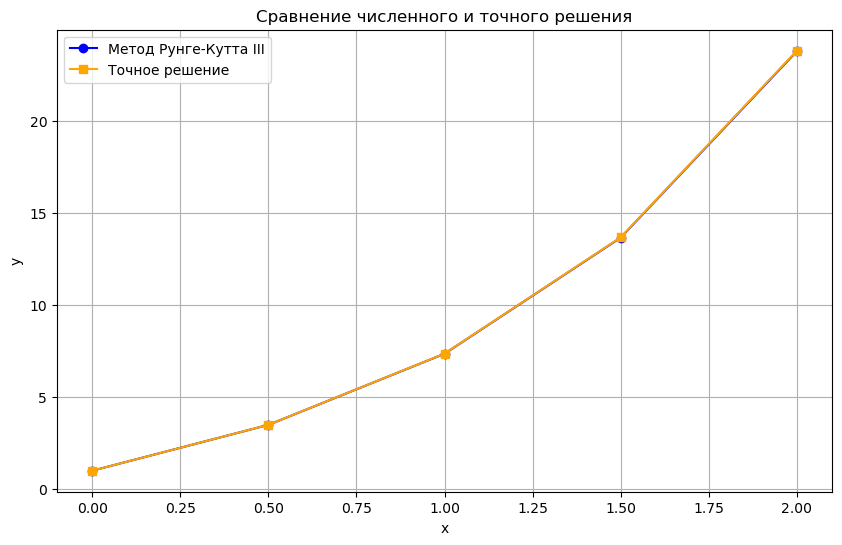

Средняя абсолютная погрешность: 0.010636


In [4]:
# Исходные данные
h = 0.5  # Шаг
x_start, x_end = 0, 2  # Диапазон [0, 2]
y0 = 1  # Начальное условие y(0) = 1

# Дифференциальное уравнение: y' = f(x, y)
def f(x, y):
    return 0.5 * y + 2.4 * x**2 + 3.7

# Метод Рунге-Кутта III порядка
def runge_kutta_3(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0
    while x < x_end:
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h, y - h * k1 + 2 * h * k2)

        y = y + h * (k1 + 4 * k2 + k3) / 6
        x = round(x + h, 10)  # Избегаем ошибок округления
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Вычисление методом Рунге-Кутта III порядка
x_vals, y_vals = runge_kutta_3(f, x_start, y0, h, x_end)

# Точное решение с использованием SymPy
x = symbols('x')
y = Function('y')
exact_solution = dsolve(Eq(y(x).diff(x), 0.5 * y(x) + 2.4 * x**2 + 3.7), y(x), ics={y(0): y0})
exact_func = exact_solution.rhs

# Вычисление точного решения в тех же точках
exact_vals = [exact_func.evalf(subs={x: xi}) for xi in x_vals]

# Создание таблицы результатов
data = {
    "x": x_vals,
    "Численное решение (Рунге-Кутта III)": y_vals,
    "Точное решение": exact_vals,
    "Абсолютная погрешность": [abs(yv - ev) for yv, ev in zip(y_vals, exact_vals)]
}
df = pd.DataFrame(data)
print("Результаты:")
print(df)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker="o", label="Метод Рунге-Кутта III", color="blue")
plt.plot(x_vals, exact_vals, marker="s", label="Точное решение", color="orange")
plt.title("Сравнение численного и точного решения")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Анализ точности
mean_error = np.mean(data["Абсолютная погрешность"])
print(f"Средняя абсолютная погрешность: {mean_error:.6f}")


## 4. методом Рунге-Кутта IV порядка

Результаты:
     x  Численное решение (Рунге-Кутта IV)    Точное решение  \
0  0.0                            1.000000  1.00000000000000   
1  0.5                            3.492383  3.49238950098630   
2  1.0                            7.360027  7.36015546876600   
3  1.5                           13.675172  13.6756007774732   
4  2.0                           23.814588  23.8155895718833   

  Абсолютная погрешность  
0                      0  
1    6.68848630125396e-6  
2   0.000128123744430830  
3   0.000428947252611778  
4    0.00100126319027893  


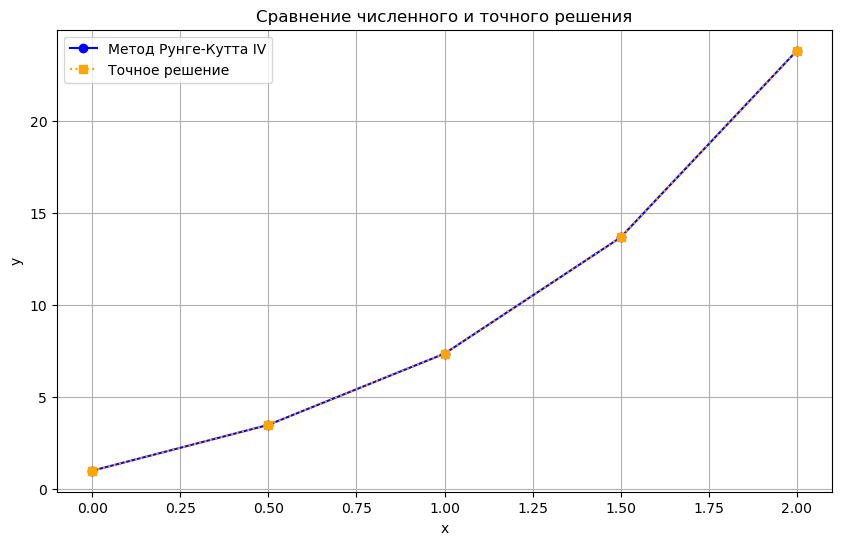

Средняя абсолютная погрешность: 0.000313


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, dsolve

# Исходные данные
h = 0.5  # Шаг
x_start, x_end = 0, 2  # Диапазон [0, 2]
y0 = 1  # Начальное условие y(0) = 1

# Дифференциальное уравнение: y' = f(x, y)
def f(x, y):
    return 0.5 * y + 2.4 * x**2 + 3.7

# Метод Рунге-Кутта IV порядка
def runge_kutta_4(f, x0, y0, h, x_end):
    x_values = [x0]
    y_values = [y0]

    x = x0
    y = y0
    while x < x_end:
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)

        y = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x = round(x + h, 10)  # Избегаем ошибок округления
        x_values.append(x)
        y_values.append(y)

    return x_values, y_values

# Вычисление методом Рунге-Кутта IV порядка
x_vals, y_vals = runge_kutta_4(f, x_start, y0, h, x_end)

# Точное решение с использованием SymPy
x = symbols('x')
y = Function('y')
exact_solution = dsolve(Eq(y(x).diff(x), 0.5 * y(x) + 2.4 * x**2 + 3.7), y(x), ics={y(0): y0})
exact_func = exact_solution.rhs

# Вычисление точного решения в тех же точках
exact_vals = [exact_func.evalf(subs={x: xi}) for xi in x_vals]

# Создание таблицы результатов
data = {
    "x": x_vals,
    "Численное решение (Рунге-Кутта IV)": y_vals,
    "Точное решение": exact_vals,
    "Абсолютная погрешность": [abs(yv - ev) for yv, ev in zip(y_vals, exact_vals)]
}
df = pd.DataFrame(data)
print("Результаты:")
print(df)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, marker="o", label="Метод Рунге-Кутта IV", color="blue")
plt.plot(x_vals, exact_vals, marker="s", label="Точное решение", color="orange", linestyle=":")
plt.title("Сравнение численного и точного решения")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

# Анализ точности
mean_error = np.mean(data["Абсолютная погрешность"])
print(f"Средняя абсолютная погрешность: {mean_error:.6f}")
